In [264]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [265]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [266]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [267]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


# Construction du Y 

In [268]:
def nb_buts(x,data):
    tab =data.values
    for i in tab:
        if i[10]>x:
            i[24] = 1
        else:
             i[24] = 0
    a = tab[:,24]
    return a.astype(int)

## MODELE 1 :Y pour buts >0,5

In [269]:
a=nb_buts(0.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,1
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,1
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,1


In [270]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [271]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [272]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([1, 1, 1, ..., 1, 0, 1])

In [273]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [274]:
model_zero_cinq = create_model()
print(model_zero_cinq.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_241 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_242 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_243 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_244 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_245 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_246 (Dense)            (None, 128)             

In [275]:
save_zero_cinq = ModelCheckpoint('model_buts_0,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [276]:
history = model_zero_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_zero_cinq])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
8910/9251 [===========================>..] - ETA: 0s - loss: 6.1086 - accuracy: 0.8679
Epoch 00001: val_accuracy improved from -inf to 0.92564, saving model to model_buts_0,5.h5
9251/9251 [==============================] - 3s 326us/sample - loss: 5.8993 - accuracy: 0.8688 - val_loss: 0.3209 - val_accuracy: 0.9256
Epoch 2/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.3249 - accuracy: 0.9232
Epoch 00002: val_accuracy did not improve from 0.92564
9251/9251 [==============================] - 2s 191us/sample - loss: 0.3236 - accuracy: 0.9235 - val_loss: 0.2808 - val_accuracy: 0.9256
Epoch 3/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.2825 - accuracy: 0.9250
Epoch 00003: val_accuracy did not improve from 0.92564
9251/9251 [==============================] - 2s 178us/sample - loss: 0.2824 - accuracy: 0.9250 - val_loss: 0.2784 - val_accuracy: 0.9256
Epoch 4/50
9090/9251 [========================

Epoch 29/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.2662 - accuracy: 0.9252
Epoch 00029: val_accuracy did not improve from 0.92564
9251/9251 [==============================] - 2s 167us/sample - loss: 0.2662 - accuracy: 0.9252 - val_loss: 0.2651 - val_accuracy: 0.9256
Epoch 30/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9249
Epoch 00030: val_accuracy did not improve from 0.92564
9251/9251 [==============================] - 2s 171us/sample - loss: 0.2659 - accuracy: 0.9252 - val_loss: 0.2663 - val_accuracy: 0.9256
Epoch 31/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.9253
Epoch 00031: val_accuracy did not improve from 0.92564
9251/9251 [==============================] - 2s 170us/sample - loss: 0.2663 - accuracy: 0.9252 - val_loss: 0.2639 - val_accuracy: 0.9256
Epoch 32/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9254
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

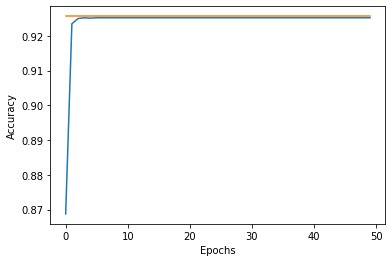

In [277]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 0.5

In [278]:
unique = x_prediction.values
results = []
superieurzero =[]
inferieurzero = []
i = 0
predictions_final = model_zero_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.08019545, 0.9198045 ]], dtype=float32)

In [279]:
model_zero_cinq.load_weights("model_buts_0,5.h5")

In [280]:
for i in unique:
    predictions_final = model_zero_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurzero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurzero.append(pred1)


In [281]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_0,5_buts':inferieurzero,'probabilité_sup_0,5_buts':superieurzero}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_0,5_buts","probabilité_sup_0,5_buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.96,0.04
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.86,0.14
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.98,0.02
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.98,0.02
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.86,0.14
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.98,0.02
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.88,0.12
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.93,0.07
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.77,0.23


In [282]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.json')

## MODELE 2 :Y pour buts > 1,5

In [283]:
a=nb_buts(1.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,0
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,0


In [284]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [285]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [286]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([1, 0, 1, ..., 0, 0, 1])

In [287]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [288]:
model_un_cinq = create_model()
print(model_un_cinq.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_256 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_257 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_258 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_259 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_260 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_261 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_262 (Dense)            (None, 128)             

In [289]:
save_un_cinq = ModelCheckpoint('model_buts_1,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [290]:
history = model_un_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_un_cinq])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
8910/9251 [===========================>..] - ETA: 0s - loss: 9.7538 - accuracy: 0.6405 
Epoch 00001: val_accuracy improved from -inf to 0.73800, saving model to model_buts_1,5.h5
9251/9251 [==============================] - 2s 266us/sample - loss: 9.4171 - accuracy: 0.6457 - val_loss: 0.6034 - val_accuracy: 0.7380
Epoch 2/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.5964 - accuracy: 0.7361 ETA: 0s - loss: 0.5976 - accuracy
Epoch 00002: val_accuracy did not improve from 0.73800
9251/9251 [==============================] - 1s 152us/sample - loss: 0.5959 - accuracy: 0.7368 - val_loss: 0.5880 - val_accuracy: 0.7380
Epoch 3/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.5854 - accuracy: 0.7392
Epoch 00003: val_accuracy did not improve from 0.73800
9251/9251 [==============================] - 1s 146us/sample - loss: 0.5867 - accuracy: 0.7379 - val_loss: 0.5935 - val_accuracy: 0.7302
Epoch 4/50


Text(0, 0.5, 'Accuracy')

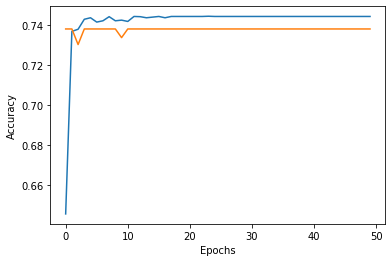

In [291]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 1.5

In [292]:
unique = x_prediction.values
results = []
superieurun =[]
inferieurun = []
i = 0
predictions_final = model_un_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.19220498, 0.80779505]], dtype=float32)

In [293]:
model_un_cinq.load_weights("model_buts_1,5.h5")

In [294]:
for i in unique:
    predictions_final = model_un_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurun.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurun.append(pred1)

In [295]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_1,5 buts':inferieurun,'probabilité_sup_1,5 buts':superieurun}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_1,5 buts","probabilité_sup_1,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.85,0.15
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.71,0.29
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.93,0.07
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.78,0.22
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.68,0.32
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.73,0.27
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.73,0.27
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.69,0.31
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.58,0.42


In [296]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.json')

## MODELE 3 :Y pour buts > 2,5

In [297]:
a=nb_buts(2.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,0
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,0
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,0


In [298]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [299]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [300]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([1, 0, 0, ..., 1, 0, 0])

In [301]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [302]:
# def create_model2():
    
#     model = Sequential()
    
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(BatchNormalization())
#     model.add(Dropout(0.05))
    
#     model.add(Dense(nbClasses, activation='softmax'))    
#     model.compile(loss="sparse_categorical_crossentropy",
#                   optimizer=Adam(),
#                   metrics=["accuracy"])
#     return model

In [303]:
model_deux_cinq= create_model()
print(model_deux_cinq.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_273 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_274 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_275 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_276 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_277 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_278 (Dense)            (None, 128)             

In [306]:
save_deux_cinq = ModelCheckpoint('model_buts_2,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [307]:
history = model_deux_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_deux_cinq])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.6978 - accuracy: 0.5376
Epoch 00001: val_accuracy improved from -inf to 0.50930, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 2s 176us/sample - loss: 0.6978 - accuracy: 0.5375 - val_loss: 0.7090 - val_accuracy: 0.5093
Epoch 2/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.6969 - accuracy: 0.5340
Epoch 00002: val_accuracy improved from 0.50930 to 0.53956, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 2s 202us/sample - loss: 0.6967 - accuracy: 0.5345 - val_loss: 0.6898 - val_accuracy: 0.5396
Epoch 3/50
8910/9251 [===========================>..] - ETA: 0s - loss: 0.6933 - accuracy: 0.5359
Epoch 00003: val_accuracy improved from 0.53956 to 0.54821, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 2s 182us/sample - loss: 0.6933 - accuracy: 0.5364 - val_loss

Text(0, 0.5, 'Accuracy')

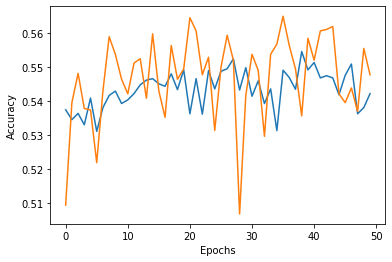

In [309]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [310]:
unique = x_prediction.values
results = []
superieur2 =[]
inferieur2 = []
i = 0
predictions_final = model_deux_cinq.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 2)

In [311]:
model_deux_cinq.load_weights("model_buts_2,5.h5")

In [312]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieur2.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieur2.append(pred1)

    print(result,predictions_final)

0 [[9.9990976e-01 9.0178597e-05]]
0 [[0.9971329  0.00286705]]
1 [[0.00628496 0.9937151 ]]
0 [[1.0000000e+00 3.1403687e-08]]
0 [[0.99795204 0.002048  ]]
0 [[1.0000000e+00 1.0464887e-08]]
0 [[9.9984860e-01 1.5143101e-04]]
1 [[0.01536193 0.98463804]]
1 [[0.10993606 0.89006394]]
0 [[1.000000e+00 2.378662e-13]]
0 [[9.9999905e-01 9.4939833e-07]]
1 [[0.4515516  0.54844844]]
0 [[1.0000000e+00 1.9409449e-20]]
0 [[0.6809188 0.3190812]]
0 [[1.0000000e+00 3.1769034e-22]]
0 [[9.999989e-01 1.116815e-06]]
0 [[9.9903715e-01 9.6282695e-04]]
0 [[0.5792789  0.42072117]]
1 [[0.14987226 0.8501277 ]]
0 [[9.9968565e-01 3.1437981e-04]]
1 [[0.02406002 0.97594   ]]
0 [[1.0000000e+00 1.2349573e-23]]
1 [[1.4247827e-07 9.9999988e-01]]
0 [[9.9996316e-01 3.6841986e-05]]
0 [[9.9999964e-01 3.7196870e-07]]
0 [[9.9975532e-01 2.4463295e-04]]
0 [[9.999355e-01 6.452806e-05]]
0 [[9.9968183e-01 3.1816179e-04]]
0 [[1.00000e+00 4.16674e-18]]
0 [[9.9998975e-01 1.0256615e-05]]
0 [[1.000000e+00 2.878391e-12]]
0 [[1.000000e+00 3.7

In [313]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_2,5 buts':inferieur2,'probabilité_sup_2,5 buts':superieur2}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_2,5 buts","probabilité_sup_2,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.00,1.00
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.00,1.00
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.99,0.01
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.00,1.00
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.00,1.00
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.00,1.00
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.01,0.99
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.00,1.00
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.01,0.99


In [314]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.json')

In [315]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'superieur_a_1,5_buts':superieurun,'superieur_a_2,5_buts':superieur2}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"superieur_a_1,5_buts","superieur_a_2,5_buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.15,1.00
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.29,1.00
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.07,0.01
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.22,1.00
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.32,1.00
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.27,1.00
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.27,0.99
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.31,1.00
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.42,0.99


In [316]:
# df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
#       'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
# df = pd.DataFrame(df)
# df

In [317]:
# df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
# df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [318]:
finished = []
scheduled = []

In [319]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [327]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","superieur_a_1,5_buts","superieur_a_2,5_buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)
df_fini = df_fini.sort_values(by = 'date',ascending= False)
df_programme= df_programme.sort_values(by = 'date',ascending= True)

In [328]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"superieur_a_1,5_buts","superieur_a_2,5_buts"
87,2020-07-11,279546,FINISHED,449,100,Brescia Calcio,AS Roma,0.29,1.00
82,2020-07-11,279537,FINISHED,109,102,Juventus FC,Atalanta BC,0.18,1.00
79,2020-07-11,264683,FINISHED,64,328,Liverpool FC,Burnley FC,0.02,0.00
80,2020-07-11,264687,FINISHED,356,61,Sheffield United FC,Chelsea FC,0.19,1.00
81,2020-07-11,264688,FINISHED,397,65,Brighton & Hove Albion FC,Manchester City FC,0.15,1.00
...,...,...,...,...,...,...,...,...,...
17,2020-07-04,264666,FINISHED,66,1044,Manchester United FC,AFC Bournemouth,0.13,0.58
3,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.22,1.00
2,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.07,0.01
1,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.29,1.00


In [329]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"superieur_a_1,5_buts","superieur_a_2,5_buts"
0,2020-07-12,264682,SCHEDULED,58,354,Aston Villa FC,Crystal Palace FC,0.31,1.0
62,2020-07-12,279542,SCHEDULED,112,103,Parma Calcio 1913,Bologna FC 1909,0.30,1.0
63,2020-07-12,279543,SCHEDULED,115,584,Udinese Calcio,UC Sampdoria,0.36,1.0
64,2020-07-12,279544,SCHEDULED,104,5890,Cagliari Calcio,US Lecce,0.35,1.0
65,2020-07-12,279538,SCHEDULED,113,98,SSC Napoli,AC Milan,0.20,1.0
...,...,...,...,...,...,...,...,...,...
123,2020-08-02,279603,SCHEDULED,449,584,Brescia Calcio,UC Sampdoria,0.38,1.0
128,2020-08-07,285543,SCHEDULED,109,523,Juventus FC,Olympique Lyonnais,0.16,1.0
127,2020-08-07,285535,SCHEDULED,65,86,Manchester City FC,Real Madrid CF,0.15,1.0
130,2020-08-08,285547,SCHEDULED,81,113,FC Barcelona,SSC Napoli,0.04,1.0


In [330]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [324]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')